In [1]:
SensorNum=2 # Sensor number
WindowWidth=[16,32,64,128,256,512,1024] # Window Width
OverlapArray=[4,8,16,32,64,128,256] # sliding window
width=1000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
Axis='AccX' # Axis

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/2016-07-25"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
if not os.path.exists(WORKSPACE_PATH+'/study/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/study/'+DataName+'/')
StudyDataPath=WORKSPACE_PATH+'/study/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/glaph/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/glaph/'+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+'/glaph/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/modelPic/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/modelPic/'+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+'/modelPic/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/window/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/window/'+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+DataName+'/'

RawDataPath="/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/raw/"

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成 & Learning**

AccX is registed now
Build Complete
(254742,)
windowData's num =63682
SourceData's aborting data = 2
window shape is (63682, 16, 1)
hiden node = 4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
47s - loss: 0.0047 - val_loss: 7.5522e-04
Epoch 2/50
58s - loss: 5.2805e-04 - val_loss: 3.6870e-04
Epoch 3/50
53s - loss: 3.5234e-04 - val_loss: 2.8712e-04
Epoch 4/50
49s - loss: 2.9637e-04 - val_loss: 2.4401e-04
Epoch 5/50
49s - loss: 2.6955e-04 - val_loss: 2.6445e-04
Epoch 6/50
50s - loss: 2.5217e-04 - val_loss: 2.4058e-04
Epoch 7/50
49s - loss: 2.4410e-04 - val_loss: 3.2867e-04
Epoch 8/50
49s - loss: 2.3681e-04 - val_loss: 1.9448e-04
Epoch 9/50
49s - loss: 2.3032e-04 - val_loss: 2.5103e-04
Epoch 10/50
49s - loss: 2.2550e-04 - val_loss: 3.1841e-04
Epoch 11/50
50s - loss: 2.2249e-04 - val_loss: 1.9147e-04
Epoch 12/50
50s - loss: 2.1917e-04 - val_loss: 2.1318e-04
Epoch 13/50
49s - loss: 2.1681e-04 - val_loss: 2.1846e-04
Epoch 14/50
49s - loss: 2.1303e-04 - val_loss: 3.7178e-04
Epoc

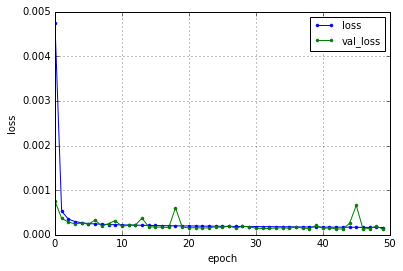

hiden node = 8
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
62s - loss: 0.0052 - val_loss: 4.7775e-04
Epoch 2/50
62s - loss: 3.6861e-04 - val_loss: 3.3796e-04
Epoch 3/50
62s - loss: 2.7611e-04 - val_loss: 2.6793e-04
Epoch 4/50
62s - loss: 2.2675e-04 - val_loss: 1.7403e-04
Epoch 5/50
62s - loss: 1.9276e-04 - val_loss: 1.4059e-04
Epoch 6/50
62s - loss: 1.7165e-04 - val_loss: 1.3952e-04
Epoch 7/50
62s - loss: 1.6002e-04 - val_loss: 1.1587e-04
Epoch 8/50
62s - loss: 1.4903e-04 - val_loss: 2.8770e-04
Epoch 9/50
62s - loss: 1.4334e-04 - val_loss: 1.0156e-04
Epoch 10/50
62s - loss: 1.3903e-04 - val_loss: 1.0232e-04
Epoch 11/50
62s - loss: 1.3610e-04 - val_loss: 2.7969e-04
Epoch 12/50
62s - loss: 1.3304e-04 - val_loss: 1.5845e-04
Epoch 13/50
62s - loss: 1.2968e-04 - val_loss: 1.0299e-04
Epoch 14/50
62s - loss: 1.2863e-04 - val_loss: 1.3467e-04
Epoch 15/50
62s - loss: 1.2648e-04 - val_loss: 8.3905e-05
Epoch 16/50
62s - loss: 1.2498e-04 - val_loss: 8.0813e-05
Epoch 17/50
62s - lo

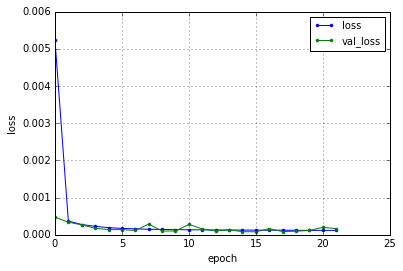

hiden node = 12
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
62s - loss: 0.0063 - val_loss: 9.2907e-04
Epoch 2/50
62s - loss: 2.3403e-04 - val_loss: 3.1970e-04
Epoch 3/50
62s - loss: 1.7768e-04 - val_loss: 1.1967e-04
Epoch 4/50
62s - loss: 1.5588e-04 - val_loss: 1.0901e-04
Epoch 5/50
62s - loss: 1.4546e-04 - val_loss: 1.1719e-04
Epoch 6/50
62s - loss: 1.3861e-04 - val_loss: 4.1278e-04
Epoch 7/50
62s - loss: 1.3347e-04 - val_loss: 8.7846e-05
Epoch 8/50
62s - loss: 1.2631e-04 - val_loss: 8.5346e-05
Epoch 9/50
62s - loss: 1.2137e-04 - val_loss: 7.8007e-05
Epoch 10/50
62s - loss: 1.2110e-04 - val_loss: 8.0101e-05
Epoch 11/50
62s - loss: 1.1649e-04 - val_loss: 7.4499e-05
Epoch 12/50
62s - loss: 1.1550e-04 - val_loss: 2.6048e-04
Epoch 13/50
62s - loss: 1.1452e-04 - val_loss: 6.7794e-05
Epoch 14/50
62s - loss: 1.1131e-04 - val_loss: 6.9856e-05
Epoch 15/50
62s - loss: 1.1017e-04 - val_loss: 1.0569e-04
Epoch 16/50
62s - loss: 1.0960e-04 - val_loss: 2.3392e-04
Epoch 17/50
61s - l

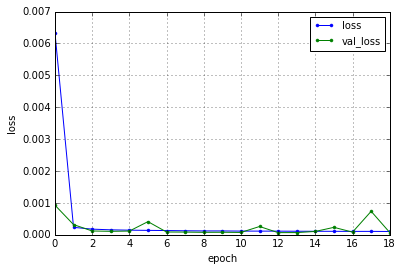

hiden node = 16
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
65s - loss: 0.0058 - val_loss: 2.8506e-04
Epoch 2/50
65s - loss: 2.0897e-04 - val_loss: 1.2811e-04
Epoch 3/50
65s - loss: 1.5200e-04 - val_loss: 1.4098e-04
Epoch 4/50
65s - loss: 1.3271e-04 - val_loss: 2.6234e-04
Epoch 5/50
66s - loss: 1.2248e-04 - val_loss: 1.0441e-04
Epoch 6/50
66s - loss: 1.1716e-04 - val_loss: 7.1415e-05
Epoch 7/50
65s - loss: 1.1160e-04 - val_loss: 6.9117e-05
Epoch 8/50
65s - loss: 1.1009e-04 - val_loss: 6.1477e-05
Epoch 9/50
65s - loss: 1.0629e-04 - val_loss: 0.0010
Epoch 10/50
66s - loss: 1.0315e-04 - val_loss: 7.2490e-05
Epoch 11/50
66s - loss: 1.0224e-04 - val_loss: 1.1808e-04
Epoch 12/50
66s - loss: 1.0091e-04 - val_loss: 3.2351e-04
Epoch 13/50
65s - loss: 9.9717e-05 - val_loss: 1.0196e-04
Epoch 14/50
65s - loss: 9.7528e-05 - val_loss: 7.0909e-05


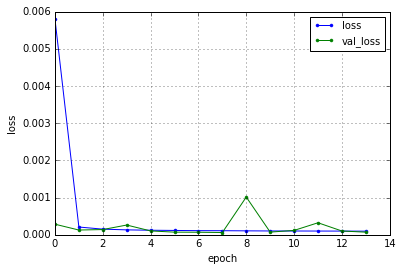

hiden node = 32
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
62s - loss: 0.0027 - val_loss: 9.0069e-04
Epoch 2/50
62s - loss: 1.6534e-04 - val_loss: 8.7244e-05
Epoch 3/50
62s - loss: 1.3635e-04 - val_loss: 7.1584e-05
Epoch 4/50
62s - loss: 1.2291e-04 - val_loss: 3.6956e-04
Epoch 5/50
62s - loss: 1.1561e-04 - val_loss: 7.2179e-05
Epoch 6/50
62s - loss: 1.0974e-04 - val_loss: 3.2695e-04
Epoch 7/50
62s - loss: 1.0574e-04 - val_loss: 6.2101e-05
Epoch 8/50
62s - loss: 1.0029e-04 - val_loss: 4.9668e-05
Epoch 9/50
62s - loss: 9.9633e-05 - val_loss: 8.9928e-04
Epoch 10/50
62s - loss: 9.8821e-05 - val_loss: 5.0324e-05
Epoch 11/50
62s - loss: 9.6060e-05 - val_loss: 2.4020e-04
Epoch 12/50
61s - loss: 9.4055e-05 - val_loss: 9.7948e-05
Epoch 13/50
61s - loss: 9.4820e-05 - val_loss: 5.2931e-05
Epoch 14/50
61s - loss: 9.0807e-05 - val_loss: 4.2358e-05
Epoch 15/50
61s - loss: 9.1229e-05 - val_loss: 4.6905e-05
Epoch 16/50
61s - loss: 8.8796e-05 - val_loss: 7.9900e-04
Epoch 17/50
61s - l

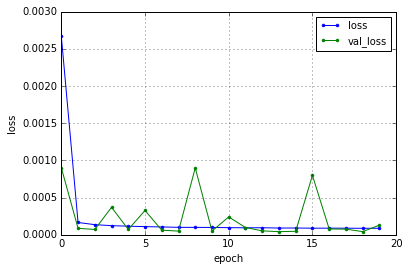

hiden node = 64
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
61s - loss: 0.0018 - val_loss: 5.6760e-05
Epoch 2/50
62s - loss: 9.0849e-05 - val_loss: 4.0939e-05
Epoch 3/50
62s - loss: 7.8982e-05 - val_loss: 1.1894e-04
Epoch 4/50
62s - loss: 7.3882e-05 - val_loss: 3.3979e-05
Epoch 5/50
62s - loss: 7.0733e-05 - val_loss: 5.1133e-05
Epoch 6/50
62s - loss: 6.8635e-05 - val_loss: 3.4208e-05
Epoch 7/50
62s - loss: 6.4154e-05 - val_loss: 2.4664e-04
Epoch 8/50
61s - loss: 6.1525e-05 - val_loss: 5.6884e-05
Epoch 9/50
62s - loss: 5.9864e-05 - val_loss: 2.1824e-05
Epoch 10/50
61s - loss: 5.7782e-05 - val_loss: 5.4275e-05
Epoch 11/50
62s - loss: 5.6428e-05 - val_loss: 2.2607e-05
Epoch 12/50
61s - loss: 5.5454e-05 - val_loss: 1.1995e-04
Epoch 13/50
61s - loss: 5.3793e-05 - val_loss: 1.0855e-04
Epoch 14/50
62s - loss: 5.2753e-05 - val_loss: 1.9122e-05
Epoch 15/50
62s - loss: 5.2177e-05 - val_loss: 2.5090e-05
Epoch 16/50
61s - loss: 4.9177e-05 - val_loss: 2.2646e-05
Epoch 17/50
61s - l

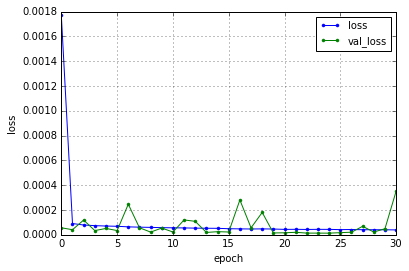

AccX is registed now
Build Complete
(254742,)
windowData's num =31839
SourceData's aborting data = 6
window shape is (31839, 32, 1)
hiden node = 4
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
15s - loss: 0.0298 - val_loss: 0.0025
Epoch 2/50
15s - loss: 0.0019 - val_loss: 0.0015
Epoch 3/50
15s - loss: 0.0013 - val_loss: 0.0011
Epoch 4/50
15s - loss: 9.9656e-04 - val_loss: 9.4096e-04
Epoch 5/50
15s - loss: 8.9949e-04 - val_loss: 8.3694e-04
Epoch 6/50
15s - loss: 8.3596e-04 - val_loss: 7.2603e-04
Epoch 7/50
14s - loss: 7.9004e-04 - val_loss: 9.5363e-04
Epoch 8/50
15s - loss: 7.4362e-04 - val_loss: 6.4495e-04
Epoch 9/50
15s - loss: 7.1342e-04 - val_loss: 0.0015
Epoch 10/50
15s - loss: 6.8782e-04 - val_loss: 5.7843e-04
Epoch 11/50
15s - loss: 6.5619e-04 - val_loss: 6.7351e-04
Epoch 12/50
15s - loss: 6.3471e-04 - val_loss: 5.3469e-04
Epoch 13/50
15s - loss: 6.1804e-04 - val_loss: 5.3800e-04
Epoch 14/50
15s - loss: 5.9972e-04 - val_loss: 6.0415e-04
Epoch 15/50
15s - loss: 5.94

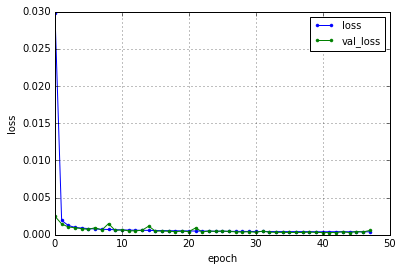

hiden node = 8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
15s - loss: 0.0162 - val_loss: 0.0014
Epoch 2/50
14s - loss: 0.0011 - val_loss: 9.7430e-04
Epoch 3/50
14s - loss: 7.8478e-04 - val_loss: 6.5114e-04
Epoch 4/50
16s - loss: 6.7289e-04 - val_loss: 5.7290e-04
Epoch 5/50
15s - loss: 6.0555e-04 - val_loss: 4.9222e-04
Epoch 6/50
15s - loss: 5.5811e-04 - val_loss: 4.3898e-04
Epoch 7/50
15s - loss: 5.2222e-04 - val_loss: 4.0997e-04
Epoch 8/50
16s - loss: 4.9371e-04 - val_loss: 4.3832e-04
Epoch 9/50
16s - loss: 4.8177e-04 - val_loss: 3.5840e-04
Epoch 10/50
15s - loss: 4.5580e-04 - val_loss: 3.5400e-04
Epoch 11/50
15s - loss: 4.3944e-04 - val_loss: 3.2244e-04
Epoch 12/50
16s - loss: 4.1928e-04 - val_loss: 3.0191e-04
Epoch 13/50
15s - loss: 3.9990e-04 - val_loss: 3.2337e-04
Epoch 14/50
15s - loss: 3.9371e-04 - val_loss: 2.9511e-04
Epoch 15/50
15s - loss: 3.8066e-04 - val_loss: 3.2527e-04
Epoch 16/50
15s - loss: 3.7104e-04 - val_loss: 2.6081e-04
Epoch 17/50
16s - loss: 3.48

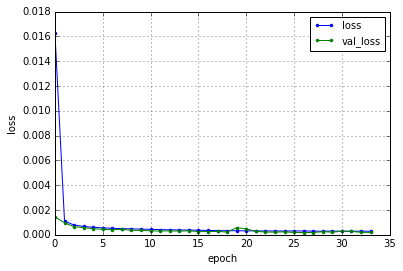

hiden node = 12
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
15s - loss: 0.0167 - val_loss: 0.0012
Epoch 2/50
15s - loss: 9.3127e-04 - val_loss: 7.2880e-04
Epoch 3/50
15s - loss: 6.3731e-04 - val_loss: 5.8413e-04
Epoch 4/50
15s - loss: 5.3060e-04 - val_loss: 4.1446e-04
Epoch 5/50
15s - loss: 4.6690e-04 - val_loss: 3.3855e-04
Epoch 6/50
15s - loss: 4.3398e-04 - val_loss: 5.7845e-04
Epoch 7/50
15s - loss: 4.1553e-04 - val_loss: 3.8552e-04
Epoch 8/50
15s - loss: 3.8836e-04 - val_loss: 0.0010
Epoch 9/50
15s - loss: 3.7579e-04 - val_loss: 2.7438e-04
Epoch 10/50
15s - loss: 3.5236e-04 - val_loss: 2.3063e-04
Epoch 11/50
15s - loss: 3.3480e-04 - val_loss: 2.1110e-04
Epoch 12/50
15s - loss: 3.1754e-04 - val_loss: 7.5096e-04
Epoch 13/50
15s - loss: 3.1104e-04 - val_loss: 4.6694e-04
Epoch 14/50
16s - loss: 3.0662e-04 - val_loss: 2.5062e-04
Epoch 15/50
15s - loss: 3.1115e-04 - val_loss: 5.9828e-04
Epoch 16/50
15s - loss: 2.9223e-04 - val_loss: 1.8404e-04
Epoch 17/50
15s - loss: 3.0

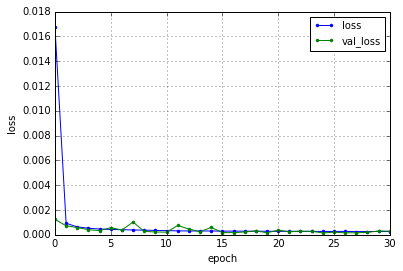

hiden node = 16
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
14s - loss: 0.0198 - val_loss: 0.0013
Epoch 2/50
15s - loss: 9.0006e-04 - val_loss: 7.1045e-04
Epoch 3/50
16s - loss: 6.2832e-04 - val_loss: 0.0012
Epoch 4/50
15s - loss: 5.1783e-04 - val_loss: 4.4863e-04
Epoch 5/50
14s - loss: 4.4615e-04 - val_loss: 4.0495e-04
Epoch 6/50
15s - loss: 4.1051e-04 - val_loss: 0.0016
Epoch 7/50
16s - loss: 3.8620e-04 - val_loss: 2.6365e-04
Epoch 8/50
15s - loss: 3.5417e-04 - val_loss: 2.2472e-04
Epoch 9/50
14s - loss: 3.4109e-04 - val_loss: 2.1378e-04
Epoch 10/50
15s - loss: 3.2986e-04 - val_loss: 2.8577e-04
Epoch 11/50
15s - loss: 3.1567e-04 - val_loss: 1.9590e-04
Epoch 12/50
15s - loss: 3.0160e-04 - val_loss: 2.0740e-04
Epoch 13/50
14s - loss: 2.9403e-04 - val_loss: 3.8421e-04
Epoch 14/50
15s - loss: 2.8532e-04 - val_loss: 8.8731e-04
Epoch 15/50
16s - loss: 2.9262e-04 - val_loss: 4.3758e-04
Epoch 16/50
15s - loss: 2.7902e-04 - val_loss: 2.2757e-04
Epoch 17/50
15s - loss: 2.8045e

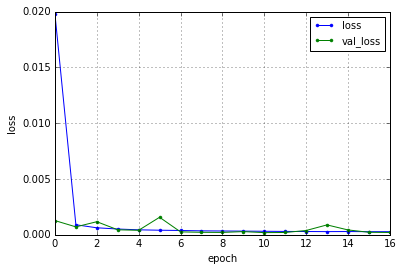

hiden node = 32
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
15s - loss: 0.0090 - val_loss: 6.5725e-04
Epoch 2/50
16s - loss: 5.5757e-04 - val_loss: 4.3379e-04
Epoch 3/50
15s - loss: 4.1353e-04 - val_loss: 2.4239e-04
Epoch 4/50
14s - loss: 3.6351e-04 - val_loss: 0.0016
Epoch 5/50
15s - loss: 3.5004e-04 - val_loss: 4.7481e-04
Epoch 6/50
16s - loss: 3.2024e-04 - val_loss: 2.0206e-04
Epoch 7/50
15s - loss: 3.0557e-04 - val_loss: 1.5566e-04
Epoch 8/50
14s - loss: 2.9688e-04 - val_loss: 1.9675e-04
Epoch 9/50
15s - loss: 3.0569e-04 - val_loss: 1.7540e-04
Epoch 10/50
16s - loss: 2.7628e-04 - val_loss: 2.6102e-04
Epoch 11/50
15s - loss: 2.7471e-04 - val_loss: 8.3673e-04
Epoch 12/50
15s - loss: 2.6741e-04 - val_loss: 1.2241e-04
Epoch 13/50
15s - loss: 2.7175e-04 - val_loss: 1.1960e-04
Epoch 14/50
16s - loss: 2.6663e-04 - val_loss: 1.5409e-04
Epoch 15/50
15s - loss: 2.6003e-04 - val_loss: 1.2892e-04
Epoch 16/50
15s - loss: 2.5118e-04 - val_loss: 1.1587e-04
Epoch 17/50
15s - loss:

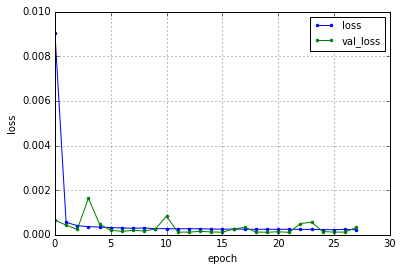

hiden node = 64
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
15s - loss: 0.0064 - val_loss: 6.6919e-04
Epoch 2/50
15s - loss: 3.8410e-04 - val_loss: 2.0563e-04
Epoch 3/50
15s - loss: 2.9607e-04 - val_loss: 1.3297e-04
Epoch 4/50
15s - loss: 2.5995e-04 - val_loss: 1.1182e-04
Epoch 5/50
15s - loss: 2.4133e-04 - val_loss: 1.0836e-04
Epoch 6/50
15s - loss: 2.2736e-04 - val_loss: 1.1763e-04
Epoch 7/50
15s - loss: 2.1673e-04 - val_loss: 1.0548e-04
Epoch 8/50
15s - loss: 2.1427e-04 - val_loss: 8.4463e-05
Epoch 9/50
15s - loss: 2.0726e-04 - val_loss: 1.9082e-04
Epoch 10/50
15s - loss: 2.0817e-04 - val_loss: 9.7546e-05
Epoch 11/50
15s - loss: 2.0428e-04 - val_loss: 8.7129e-05
Epoch 12/50
15s - loss: 1.8996e-04 - val_loss: 7.8535e-05
Epoch 13/50
16s - loss: 1.9530e-04 - val_loss: 7.1512e-05
Epoch 14/50
15s - loss: 1.9293e-04 - val_loss: 8.2426e-05
Epoch 15/50
15s - loss: 1.8381e-04 - val_loss: 7.0098e-05
Epoch 16/50
15s - loss: 1.8529e-04 - val_loss: 3.4399e-04
Epoch 17/50
15s - l

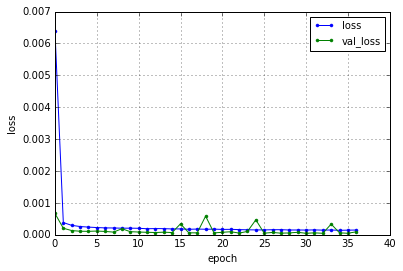

AccX is registed now
Build Complete
(254742,)
windowData's num =15918
SourceData's aborting data = 6
window shape is (15918, 64, 1)
hiden node = 4
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0598 - val_loss: 0.0075
Epoch 2/50
3s - loss: 0.0059 - val_loss: 0.0049
Epoch 3/50
3s - loss: 0.0044 - val_loss: 0.0039
Epoch 4/50
3s - loss: 0.0036 - val_loss: 0.0032
Epoch 5/50
3s - loss: 0.0029 - val_loss: 0.0024
Epoch 6/50
3s - loss: 0.0023 - val_loss: 0.0022
Epoch 7/50
3s - loss: 0.0021 - val_loss: 0.0018
Epoch 8/50
3s - loss: 0.0020 - val_loss: 0.0019
Epoch 9/50
4s - loss: 0.0019 - val_loss: 0.0017
Epoch 10/50
4s - loss: 0.0018 - val_loss: 0.0016
Epoch 11/50
4s - loss: 0.0018 - val_loss: 0.0015
Epoch 12/50
4s - loss: 0.0017 - val_loss: 0.0016
Epoch 13/50
4s - loss: 0.0017 - val_loss: 0.0014
Epoch 14/50
4s - loss: 0.0017 - val_loss: 0.0014
Epoch 15/50
4s - loss: 0.0017 - val_loss: 0.0014
Epoch 16/50
3s - loss: 0.0016 - val_loss: 0.0014
Epoch 17/50
3s - loss: 0.001

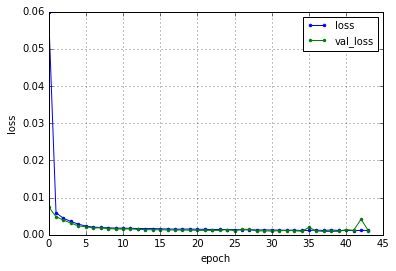

hiden node = 8
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
4s - loss: 0.0472 - val_loss: 0.0059
Epoch 2/50
4s - loss: 0.0049 - val_loss: 0.0038
Epoch 3/50
3s - loss: 0.0033 - val_loss: 0.0027
Epoch 4/50
3s - loss: 0.0024 - val_loss: 0.0032
Epoch 5/50
3s - loss: 0.0021 - val_loss: 0.0017
Epoch 6/50
3s - loss: 0.0019 - val_loss: 0.0026
Epoch 7/50
3s - loss: 0.0017 - val_loss: 0.0015
Epoch 8/50
3s - loss: 0.0017 - val_loss: 0.0014
Epoch 9/50
3s - loss: 0.0016 - val_loss: 0.0013
Epoch 10/50
3s - loss: 0.0015 - val_loss: 0.0017
Epoch 11/50
4s - loss: 0.0015 - val_loss: 0.0012
Epoch 12/50
4s - loss: 0.0015 - val_loss: 0.0022
Epoch 13/50
4s - loss: 0.0014 - val_loss: 0.0013
Epoch 14/50
4s - loss: 0.0014 - val_loss: 0.0010
Epoch 15/50
4s - loss: 0.0013 - val_loss: 0.0012
Epoch 16/50
4s - loss: 0.0013 - val_loss: 9.6743e-04
Epoch 17/50
4s - loss: 0.0013 - val_loss: 9.5659e-04
Epoch 18/50
3s - loss: 0.0013 - val_loss: 0.0015
Epoch 19/50
3s - loss: 0.0012 - val_loss: 9.2410e-04
E

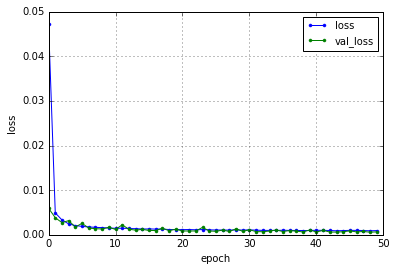

hiden node = 12
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0474 - val_loss: 0.0052
Epoch 2/50
3s - loss: 0.0041 - val_loss: 0.0032
Epoch 3/50
3s - loss: 0.0025 - val_loss: 0.0022
Epoch 4/50
3s - loss: 0.0019 - val_loss: 0.0015
Epoch 5/50
3s - loss: 0.0017 - val_loss: 0.0021
Epoch 6/50
3s - loss: 0.0016 - val_loss: 0.0012
Epoch 7/50
3s - loss: 0.0014 - val_loss: 0.0011
Epoch 8/50
4s - loss: 0.0013 - val_loss: 0.0011
Epoch 9/50
4s - loss: 0.0013 - val_loss: 0.0015
Epoch 10/50
4s - loss: 0.0013 - val_loss: 0.0016
Epoch 11/50
4s - loss: 0.0012 - val_loss: 8.7551e-04
Epoch 12/50
4s - loss: 0.0012 - val_loss: 0.0011
Epoch 13/50
4s - loss: 0.0011 - val_loss: 7.9177e-04
Epoch 14/50
4s - loss: 0.0011 - val_loss: 0.0013
Epoch 15/50
3s - loss: 0.0011 - val_loss: 9.1887e-04
Epoch 16/50
3s - loss: 0.0011 - val_loss: 7.6342e-04
Epoch 17/50
3s - loss: 0.0011 - val_loss: 6.9908e-04
Epoch 18/50
3s - loss: 0.0010 - val_loss: 0.0018
Epoch 19/50
3s - loss: 9.7683e-04 - val_l

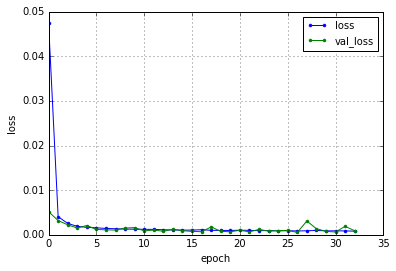

hiden node = 16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0543 - val_loss: 0.0044
Epoch 2/50
3s - loss: 0.0033 - val_loss: 0.0021
Epoch 3/50
3s - loss: 0.0021 - val_loss: 0.0021
Epoch 4/50
3s - loss: 0.0018 - val_loss: 0.0017
Epoch 5/50
3s - loss: 0.0016 - val_loss: 0.0014
Epoch 6/50
4s - loss: 0.0015 - val_loss: 0.0011
Epoch 7/50
4s - loss: 0.0014 - val_loss: 0.0013
Epoch 8/50
4s - loss: 0.0013 - val_loss: 0.0012
Epoch 9/50
4s - loss: 0.0012 - val_loss: 0.0012
Epoch 10/50
4s - loss: 0.0012 - val_loss: 8.3272e-04
Epoch 11/50
4s - loss: 0.0012 - val_loss: 0.0011
Epoch 12/50
4s - loss: 0.0011 - val_loss: 0.0010
Epoch 13/50
3s - loss: 0.0011 - val_loss: 7.7563e-04
Epoch 14/50
3s - loss: 0.0011 - val_loss: 0.0018
Epoch 15/50
3s - loss: 0.0010 - val_loss: 6.4297e-04
Epoch 16/50
3s - loss: 0.0010 - val_loss: 0.0012
Epoch 17/50
3s - loss: 9.4205e-04 - val_loss: 0.0012
Epoch 18/50
3s - loss: 9.5928e-04 - val_loss: 6.9371e-04
Epoch 19/50
3s - loss: 9.4715e-04 - v

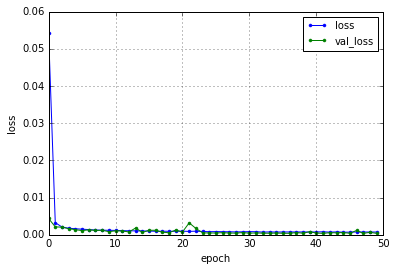

hiden node = 32
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0277 - val_loss: 0.0029
Epoch 2/50
4s - loss: 0.0023 - val_loss: 0.0017
Epoch 3/50
4s - loss: 0.0017 - val_loss: 0.0012
Epoch 4/50
4s - loss: 0.0015 - val_loss: 0.0020
Epoch 5/50
4s - loss: 0.0013 - val_loss: 0.0011
Epoch 6/50
4s - loss: 0.0013 - val_loss: 0.0011
Epoch 7/50
4s - loss: 0.0013 - val_loss: 0.0012
Epoch 8/50
4s - loss: 0.0012 - val_loss: 7.2527e-04
Epoch 9/50
3s - loss: 0.0011 - val_loss: 8.6743e-04
Epoch 10/50
3s - loss: 0.0010 - val_loss: 8.2596e-04
Epoch 11/50
3s - loss: 0.0011 - val_loss: 6.2704e-04
Epoch 12/50
3s - loss: 0.0011 - val_loss: 8.0249e-04
Epoch 13/50
3s - loss: 9.8116e-04 - val_loss: 5.9178e-04
Epoch 14/50
3s - loss: 9.2592e-04 - val_loss: 0.0035
Epoch 15/50
3s - loss: 8.8428e-04 - val_loss: 0.0010
Epoch 16/50
3s - loss: 9.0018e-04 - val_loss: 0.0010
Epoch 17/50
3s - loss: 8.8719e-04 - val_loss: 0.0012
Epoch 18/50
4s - loss: 8.7049e-04 - val_loss: 4.8944e-04
Epoch 19/

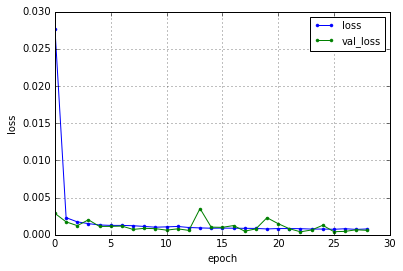

hiden node = 64
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
3s - loss: 0.0188 - val_loss: 0.0017
Epoch 2/50
3s - loss: 0.0016 - val_loss: 0.0010
Epoch 3/50
3s - loss: 0.0013 - val_loss: 8.0175e-04
Epoch 4/50
4s - loss: 0.0012 - val_loss: 6.7585e-04
Epoch 5/50
4s - loss: 0.0011 - val_loss: 0.0015
Epoch 6/50
4s - loss: 0.0010 - val_loss: 5.7559e-04
Epoch 7/50
4s - loss: 9.6831e-04 - val_loss: 6.9575e-04
Epoch 8/50
4s - loss: 9.9452e-04 - val_loss: 6.8054e-04
Epoch 9/50
4s - loss: 0.0010 - val_loss: 4.6218e-04
Epoch 10/50
4s - loss: 9.2607e-04 - val_loss: 4.4047e-04
Epoch 11/50
3s - loss: 9.1639e-04 - val_loss: 4.3060e-04
Epoch 12/50
3s - loss: 8.8458e-04 - val_loss: 4.6137e-04
Epoch 13/50
3s - loss: 8.7402e-04 - val_loss: 9.0591e-04
Epoch 14/50
3s - loss: 8.3478e-04 - val_loss: 4.8553e-04
Epoch 15/50
3s - loss: 8.2467e-04 - val_loss: 7.8742e-04
Epoch 16/50
3s - loss: 7.9865e-04 - val_loss: 4.3304e-04
Epoch 17/50
3s - loss: 8.2538e-04 - val_loss: 3.5063e-04
Epoch 18/50
3s

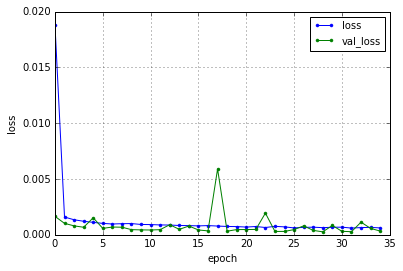

AccX is registed now
Build Complete
(254742,)
windowData's num =7957
SourceData's aborting data = 22
window shape is (7957, 128, 1)
hiden node = 4
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.2384 - val_loss: 0.0726
Epoch 2/50
1s - loss: 0.0420 - val_loss: 0.0252
Epoch 3/50
1s - loss: 0.0192 - val_loss: 0.0156
Epoch 4/50
1s - loss: 0.0143 - val_loss: 0.0143
Epoch 5/50
1s - loss: 0.0123 - val_loss: 0.0124
Epoch 6/50
1s - loss: 0.0110 - val_loss: 0.0101
Epoch 7/50
1s - loss: 0.0099 - val_loss: 0.0094
Epoch 8/50
1s - loss: 0.0091 - val_loss: 0.0082
Epoch 9/50
1s - loss: 0.0080 - val_loss: 0.0075
Epoch 10/50
1s - loss: 0.0070 - val_loss: 0.0064
Epoch 11/50
1s - loss: 0.0063 - val_loss: 0.0057
Epoch 12/50
1s - loss: 0.0057 - val_loss: 0.0051
Epoch 13/50
1s - loss: 0.0052 - val_loss: 0.0056
Epoch 14/50
1s - loss: 0.0050 - val_loss: 0.0045
Epoch 15/50
1s - loss: 0.0047 - val_loss: 0.0047
Epoch 16/50
1s - loss: 0.0046 - val_loss: 0.0050
Epoch 17/50
1s - loss: 0.0044 

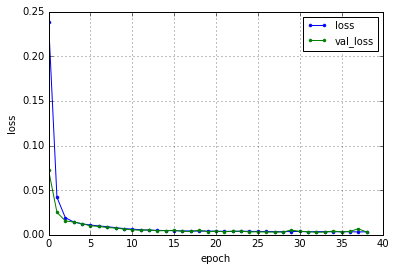

hiden node = 8
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.2454 - val_loss: 0.0562
Epoch 2/50
0s - loss: 0.0309 - val_loss: 0.0182
Epoch 3/50
0s - loss: 0.0147 - val_loss: 0.0126
Epoch 4/50
0s - loss: 0.0116 - val_loss: 0.0106
Epoch 5/50
0s - loss: 0.0097 - val_loss: 0.0139
Epoch 6/50
0s - loss: 0.0079 - val_loss: 0.0067
Epoch 7/50
0s - loss: 0.0063 - val_loss: 0.0077
Epoch 8/50
0s - loss: 0.0054 - val_loss: 0.0054
Epoch 9/50
0s - loss: 0.0048 - val_loss: 0.0049
Epoch 10/50
1s - loss: 0.0044 - val_loss: 0.0043
Epoch 11/50
1s - loss: 0.0041 - val_loss: 0.0043
Epoch 12/50
1s - loss: 0.0040 - val_loss: 0.0035
Epoch 13/50
1s - loss: 0.0037 - val_loss: 0.0033
Epoch 14/50
1s - loss: 0.0035 - val_loss: 0.0031
Epoch 15/50
1s - loss: 0.0035 - val_loss: 0.0031
Epoch 16/50
1s - loss: 0.0036 - val_loss: 0.0083
Epoch 17/50
1s - loss: 0.0033 - val_loss: 0.0027
Epoch 18/50
1s - loss: 0.0031 - val_loss: 0.0028
Epoch 19/50
1s - loss: 0.0036 - val_loss: 0.0025
Epoch 20/50
1s 

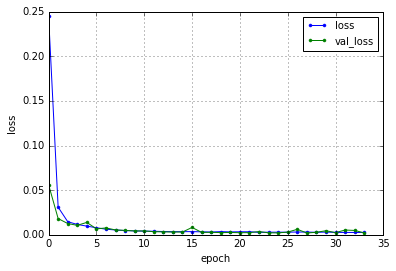

hiden node = 12
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.1967 - val_loss: 0.0340
Epoch 2/50
1s - loss: 0.0203 - val_loss: 0.0175
Epoch 3/50
1s - loss: 0.0115 - val_loss: 0.0099
Epoch 4/50
1s - loss: 0.0091 - val_loss: 0.0086
Epoch 5/50
1s - loss: 0.0070 - val_loss: 0.0055
Epoch 6/50
0s - loss: 0.0056 - val_loss: 0.0064
Epoch 7/50
0s - loss: 0.0048 - val_loss: 0.0045
Epoch 8/50
0s - loss: 0.0044 - val_loss: 0.0062
Epoch 9/50
0s - loss: 0.0043 - val_loss: 0.0035
Epoch 10/50
0s - loss: 0.0041 - val_loss: 0.0033
Epoch 11/50
0s - loss: 0.0040 - val_loss: 0.0056
Epoch 12/50
0s - loss: 0.0037 - val_loss: 0.0035
Epoch 13/50
0s - loss: 0.0038 - val_loss: 0.0032
Epoch 14/50
0s - loss: 0.0037 - val_loss: 0.0036
Epoch 15/50
0s - loss: 0.0037 - val_loss: 0.0037
Epoch 16/50
0s - loss: 0.0039 - val_loss: 0.0041
Epoch 17/50
0s - loss: 0.0035 - val_loss: 0.0027
Epoch 18/50
0s - loss: 0.0034 - val_loss: 0.0027
Epoch 19/50
0s - loss: 0.0036 - val_loss: 0.0042
Epoch 20/50
0s

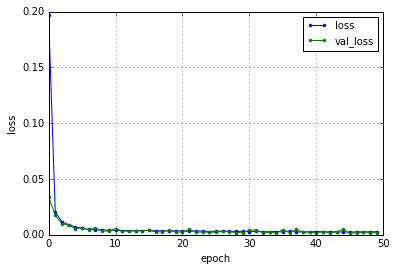

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.1524 - val_loss: 0.0237
Epoch 2/50
1s - loss: 0.0156 - val_loss: 0.0113
Epoch 3/50
1s - loss: 0.0106 - val_loss: 0.0084
Epoch 4/50
1s - loss: 0.0079 - val_loss: 0.0070
Epoch 5/50
1s - loss: 0.0057 - val_loss: 0.0046
Epoch 6/50
1s - loss: 0.0050 - val_loss: 0.0038
Epoch 7/50
1s - loss: 0.0043 - val_loss: 0.0037
Epoch 8/50
1s - loss: 0.0040 - val_loss: 0.0031
Epoch 9/50
1s - loss: 0.0037 - val_loss: 0.0033
Epoch 10/50
1s - loss: 0.0035 - val_loss: 0.0035
Epoch 11/50
1s - loss: 0.0037 - val_loss: 0.0028
Epoch 12/50
1s - loss: 0.0037 - val_loss: 0.0033
Epoch 13/50
1s - loss: 0.0033 - val_loss: 0.0029
Epoch 14/50
1s - loss: 0.0033 - val_loss: 0.0032
Epoch 15/50
1s - loss: 0.0033 - val_loss: 0.0042
Epoch 16/50
0s - loss: 0.0033 - val_loss: 0.0038
Epoch 17/50
0s - loss: 0.0029 - val_loss: 0.0021
Epoch 18/50
0s - loss: 0.0029 - val_loss: 0.0020
Epoch 19/50
0s - loss: 0.0030 - val_loss: 0.0021
Epoch 20/50
0s

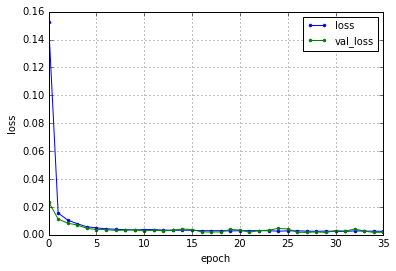

hiden node = 32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0974 - val_loss: 0.0137
Epoch 2/50
0s - loss: 0.0093 - val_loss: 0.0060
Epoch 3/50
0s - loss: 0.0057 - val_loss: 0.0042
Epoch 4/50
0s - loss: 0.0044 - val_loss: 0.0045
Epoch 5/50
0s - loss: 0.0039 - val_loss: 0.0047
Epoch 6/50
0s - loss: 0.0038 - val_loss: 0.0030
Epoch 7/50
1s - loss: 0.0036 - val_loss: 0.0046
Epoch 8/50
1s - loss: 0.0036 - val_loss: 0.0035
Epoch 9/50
1s - loss: 0.0033 - val_loss: 0.0022
Epoch 10/50
1s - loss: 0.0035 - val_loss: 0.0024
Epoch 11/50
1s - loss: 0.0029 - val_loss: 0.0084
Epoch 12/50
1s - loss: 0.0033 - val_loss: 0.0031
Epoch 13/50
1s - loss: 0.0032 - val_loss: 0.0063
Epoch 14/50
1s - loss: 0.0029 - val_loss: 0.0019
Epoch 15/50
1s - loss: 0.0027 - val_loss: 0.0019
Epoch 16/50
1s - loss: 0.0030 - val_loss: 0.0027
Epoch 17/50
1s - loss: 0.0027 - val_loss: 0.0021
Epoch 18/50
1s - loss: 0.0027 - val_loss: 0.0023
Epoch 19/50
1s - loss: 0.0028 - val_loss: 0.0017
Epoch 20/50
1s

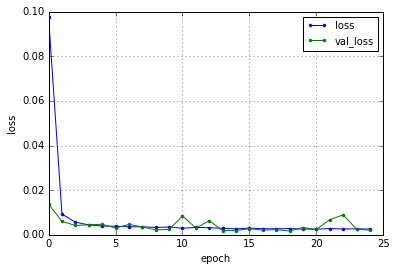

hiden node = 64
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.0741 - val_loss: 0.0083
Epoch 2/50
1s - loss: 0.0064 - val_loss: 0.0057
Epoch 3/50
1s - loss: 0.0047 - val_loss: 0.0040
Epoch 4/50
1s - loss: 0.0042 - val_loss: 0.0029
Epoch 5/50
1s - loss: 0.0036 - val_loss: 0.0063
Epoch 6/50
1s - loss: 0.0036 - val_loss: 0.0029
Epoch 7/50
1s - loss: 0.0033 - val_loss: 0.0035
Epoch 8/50
1s - loss: 0.0032 - val_loss: 0.0028
Epoch 9/50
1s - loss: 0.0030 - val_loss: 0.0027
Epoch 10/50
1s - loss: 0.0029 - val_loss: 0.0027
Epoch 11/50
1s - loss: 0.0030 - val_loss: 0.0036
Epoch 12/50
0s - loss: 0.0028 - val_loss: 0.0034
Epoch 13/50
0s - loss: 0.0026 - val_loss: 0.0028
Epoch 14/50
0s - loss: 0.0027 - val_loss: 0.0045
Epoch 15/50
0s - loss: 0.0028 - val_loss: 0.0028


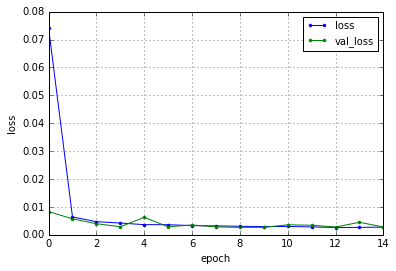

AccX is registed now
Build Complete
(254742,)
windowData's num =3977
SourceData's aborting data = 22
window shape is (3977, 256, 1)
hiden node = 4
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.4622 - val_loss: 0.3472
Epoch 2/50
0s - loss: 0.2702 - val_loss: 0.2057
Epoch 3/50
0s - loss: 0.1659 - val_loss: 0.1315
Epoch 4/50
0s - loss: 0.1091 - val_loss: 0.0894
Epoch 5/50
0s - loss: 0.0763 - val_loss: 0.0647
Epoch 6/50
0s - loss: 0.0568 - val_loss: 0.0503
Epoch 7/50
0s - loss: 0.0449 - val_loss: 0.0405
Epoch 8/50
0s - loss: 0.0374 - val_loss: 0.0344
Epoch 9/50
0s - loss: 0.0327 - val_loss: 0.0308
Epoch 10/50
0s - loss: 0.0295 - val_loss: 0.0288
Epoch 11/50
0s - loss: 0.0280 - val_loss: 0.0263
Epoch 12/50
0s - loss: 0.0268 - val_loss: 0.0388
Epoch 13/50
0s - loss: 0.0253 - val_loss: 0.0244
Epoch 14/50
0s - loss: 0.0242 - val_loss: 0.0257
Epoch 15/50
0s - loss: 0.0243 - val_loss: 0.0225
Epoch 16/50
0s - loss: 0.0228 - val_loss: 0.0238
Epoch 17/50
0s - loss: 0.0224 

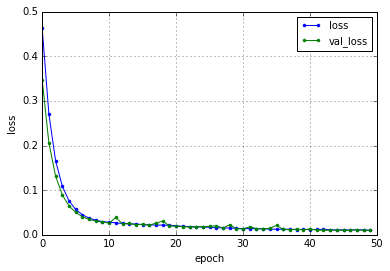

hiden node = 8
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.4054 - val_loss: 0.2237
Epoch 2/50
0s - loss: 0.1444 - val_loss: 0.0919
Epoch 3/50
0s - loss: 0.0705 - val_loss: 0.0551
Epoch 4/50
0s - loss: 0.0464 - val_loss: 0.0397
Epoch 5/50
0s - loss: 0.0356 - val_loss: 0.0328
Epoch 6/50
0s - loss: 0.0301 - val_loss: 0.0294
Epoch 7/50
0s - loss: 0.0274 - val_loss: 0.0295
Epoch 8/50
0s - loss: 0.0268 - val_loss: 0.0429
Epoch 9/50
0s - loss: 0.0266 - val_loss: 0.0232
Epoch 10/50
0s - loss: 0.0256 - val_loss: 0.0277
Epoch 11/50
0s - loss: 0.0256 - val_loss: 0.0209
Epoch 12/50
0s - loss: 0.0238 - val_loss: 0.0210
Epoch 13/50
0s - loss: 0.0238 - val_loss: 0.0269
Epoch 14/50
0s - loss: 0.0202 - val_loss: 0.0338
Epoch 15/50
0s - loss: 0.0189 - val_loss: 0.0227
Epoch 16/50
0s - loss: 0.0180 - val_loss: 0.0270
Epoch 17/50
0s - loss: 0.0170 - val_loss: 0.0189
Epoch 18/50
0s - loss: 0.0156 - val_loss: 0.0163
Epoch 19/50
0s - loss: 0.0147 - val_loss: 0.0128
Epoch 20/50
0s 

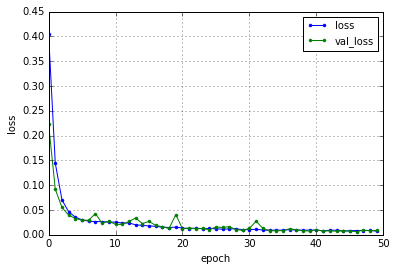

hiden node = 12
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.3635 - val_loss: 0.1805
Epoch 2/50
0s - loss: 0.1127 - val_loss: 0.0708
Epoch 3/50
0s - loss: 0.0548 - val_loss: 0.0439
Epoch 4/50
0s - loss: 0.0372 - val_loss: 0.0323
Epoch 5/50
0s - loss: 0.0296 - val_loss: 0.0333
Epoch 6/50
0s - loss: 0.0257 - val_loss: 0.0250
Epoch 7/50
0s - loss: 0.0241 - val_loss: 0.0223
Epoch 8/50
0s - loss: 0.0227 - val_loss: 0.0203
Epoch 9/50
0s - loss: 0.0216 - val_loss: 0.0190
Epoch 10/50
0s - loss: 0.0203 - val_loss: 0.0345
Epoch 11/50
0s - loss: 0.0182 - val_loss: 0.0158
Epoch 12/50
0s - loss: 0.0166 - val_loss: 0.0153
Epoch 13/50
0s - loss: 0.0165 - val_loss: 0.0140
Epoch 14/50
0s - loss: 0.0151 - val_loss: 0.0138
Epoch 15/50
0s - loss: 0.0145 - val_loss: 0.0163
Epoch 16/50
0s - loss: 0.0138 - val_loss: 0.0110
Epoch 17/50
0s - loss: 0.0128 - val_loss: 0.0199
Epoch 18/50
0s - loss: 0.0124 - val_loss: 0.0123
Epoch 19/50
0s - loss: 0.0113 - val_loss: 0.0133
Epoch 20/50
0s

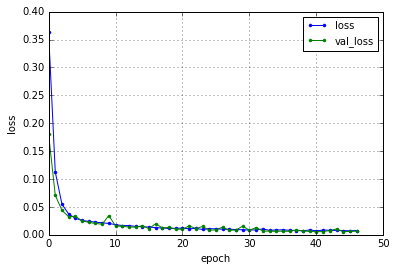

hiden node = 16
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.3233 - val_loss: 0.1332
Epoch 2/50
0s - loss: 0.0824 - val_loss: 0.0531
Epoch 3/50
0s - loss: 0.0420 - val_loss: 0.0355
Epoch 4/50
0s - loss: 0.0304 - val_loss: 0.0275
Epoch 5/50
0s - loss: 0.0255 - val_loss: 0.0284
Epoch 6/50
0s - loss: 0.0232 - val_loss: 0.0211
Epoch 7/50
0s - loss: 0.0218 - val_loss: 0.0202
Epoch 8/50
0s - loss: 0.0195 - val_loss: 0.0226
Epoch 9/50
0s - loss: 0.0198 - val_loss: 0.0154
Epoch 10/50
0s - loss: 0.0186 - val_loss: 0.0143
Epoch 11/50
0s - loss: 0.0161 - val_loss: 0.0253
Epoch 12/50
0s - loss: 0.0157 - val_loss: 0.0131
Epoch 13/50
0s - loss: 0.0144 - val_loss: 0.0122
Epoch 14/50
0s - loss: 0.0137 - val_loss: 0.0111
Epoch 15/50
0s - loss: 0.0134 - val_loss: 0.0171
Epoch 16/50
0s - loss: 0.0120 - val_loss: 0.0151
Epoch 17/50
0s - loss: 0.0113 - val_loss: 0.0102
Epoch 18/50
0s - loss: 0.0121 - val_loss: 0.0124
Epoch 19/50
0s - loss: 0.0123 - val_loss: 0.0101
Epoch 20/50
0s

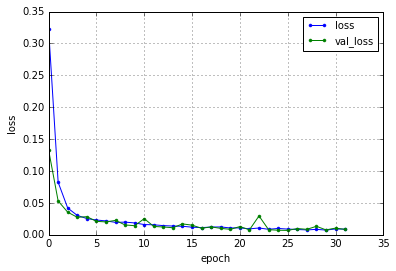

hiden node = 32
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.2853 - val_loss: 0.0833
Epoch 2/50
0s - loss: 0.0514 - val_loss: 0.0352
Epoch 3/50
0s - loss: 0.0295 - val_loss: 0.0262
Epoch 4/50
0s - loss: 0.0231 - val_loss: 0.0212
Epoch 5/50
0s - loss: 0.0199 - val_loss: 0.0180
Epoch 6/50
0s - loss: 0.0189 - val_loss: 0.0179
Epoch 7/50
0s - loss: 0.0169 - val_loss: 0.0287
Epoch 8/50
0s - loss: 0.0162 - val_loss: 0.0203
Epoch 9/50
0s - loss: 0.0146 - val_loss: 0.0199
Epoch 10/50
0s - loss: 0.0137 - val_loss: 0.0106
Epoch 11/50
0s - loss: 0.0124 - val_loss: 0.0123
Epoch 12/50
0s - loss: 0.0121 - val_loss: 0.0155
Epoch 13/50
0s - loss: 0.0119 - val_loss: 0.0085
Epoch 14/50
0s - loss: 0.0118 - val_loss: 0.0088
Epoch 15/50
0s - loss: 0.0108 - val_loss: 0.0094
Epoch 16/50
0s - loss: 0.0110 - val_loss: 0.0083
Epoch 17/50
0s - loss: 0.0101 - val_loss: 0.0102
Epoch 18/50
0s - loss: 0.0105 - val_loss: 0.0074
Epoch 19/50
0s - loss: 0.0095 - val_loss: 0.0069
Epoch 20/50
0s

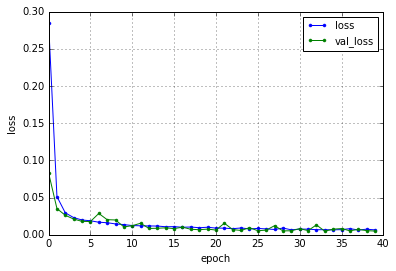

hiden node = 64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1738 - val_loss: 0.0361
Epoch 2/50
0s - loss: 0.0286 - val_loss: 0.0240
Epoch 3/50
0s - loss: 0.0202 - val_loss: 0.0181
Epoch 4/50
0s - loss: 0.0164 - val_loss: 0.0149
Epoch 5/50
0s - loss: 0.0147 - val_loss: 0.0283
Epoch 6/50
0s - loss: 0.0126 - val_loss: 0.0106
Epoch 7/50
0s - loss: 0.0101 - val_loss: 0.0109
Epoch 8/50
0s - loss: 0.0112 - val_loss: 0.0141
Epoch 9/50
0s - loss: 0.0092 - val_loss: 0.0127
Epoch 10/50
0s - loss: 0.0088 - val_loss: 0.0076
Epoch 11/50
0s - loss: 0.0085 - val_loss: 0.0117
Epoch 12/50
0s - loss: 0.0091 - val_loss: 0.0074
Epoch 13/50
0s - loss: 0.0073 - val_loss: 0.0069
Epoch 14/50
0s - loss: 0.0093 - val_loss: 0.0068
Epoch 15/50
0s - loss: 0.0073 - val_loss: 0.0052
Epoch 16/50
0s - loss: 0.0077 - val_loss: 0.0089
Epoch 17/50
0s - loss: 0.0070 - val_loss: 0.0059
Epoch 18/50
0s - loss: 0.0080 - val_loss: 0.0051
Epoch 19/50
0s - loss: 0.0060 - val_loss: 0.0059
Epoch 20/50
0s

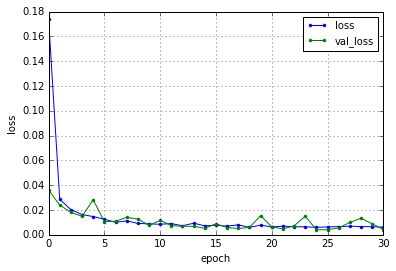

AccX is registed now
Build Complete
(254742,)
windowData's num =1987
SourceData's aborting data = 22
window shape is (1987, 512, 1)
hiden node = 4
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.5392 - val_loss: 0.5110
Epoch 2/50
0s - loss: 0.4829 - val_loss: 0.4500
Epoch 3/50
0s - loss: 0.4244 - val_loss: 0.3952
Epoch 4/50
0s - loss: 0.3731 - val_loss: 0.3479
Epoch 5/50
0s - loss: 0.3290 - val_loss: 0.3074
Epoch 6/50
0s - loss: 0.2912 - val_loss: 0.2727
Epoch 7/50
0s - loss: 0.2589 - val_loss: 0.2430
Epoch 8/50
0s - loss: 0.2312 - val_loss: 0.2176
Epoch 9/50
0s - loss: 0.2073 - val_loss: 0.1955
Epoch 10/50
0s - loss: 0.1866 - val_loss: 0.1764
Epoch 11/50
0s - loss: 0.1687 - val_loss: 0.1599
Epoch 12/50
0s - loss: 0.1531 - val_loss: 0.1455
Epoch 13/50
0s - loss: 0.1396 - val_loss: 0.1328
Epoch 14/50
0s - loss: 0.1277 - val_loss: 0.1218
Epoch 15/50
0s - loss: 0.1173 - val_loss: 0.1121
Epoch 16/50
0s - loss: 0.1082 - val_loss: 0.1036
Epoch 17/50
0s - loss: 0.1001 

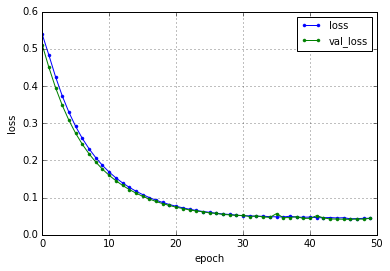

hiden node = 8
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.5354 - val_loss: 0.4997
Epoch 2/50
0s - loss: 0.4623 - val_loss: 0.4174
Epoch 3/50
0s - loss: 0.3822 - val_loss: 0.3415
Epoch 4/50
0s - loss: 0.3108 - val_loss: 0.2769
Epoch 5/50
0s - loss: 0.2532 - val_loss: 0.2274
Epoch 6/50
0s - loss: 0.2093 - val_loss: 0.1895
Epoch 7/50
0s - loss: 0.1757 - val_loss: 0.1604
Epoch 8/50
0s - loss: 0.1497 - val_loss: 0.1376
Epoch 9/50
0s - loss: 0.1292 - val_loss: 0.1197
Epoch 10/50
0s - loss: 0.1130 - val_loss: 0.1055
Epoch 11/50
0s - loss: 0.1002 - val_loss: 0.0942
Epoch 12/50
0s - loss: 0.0899 - val_loss: 0.0851
Epoch 13/50
0s - loss: 0.0815 - val_loss: 0.0775
Epoch 14/50
0s - loss: 0.0747 - val_loss: 0.0714
Epoch 15/50
0s - loss: 0.0691 - val_loss: 0.0665
Epoch 16/50
0s - loss: 0.0644 - val_loss: 0.0621
Epoch 17/50
0s - loss: 0.0605 - val_loss: 0.0588
Epoch 18/50
0s - loss: 0.0573 - val_loss: 0.0557
Epoch 19/50
0s - loss: 0.0546 - val_loss: 0.0536
Epoch 20/50
0s 

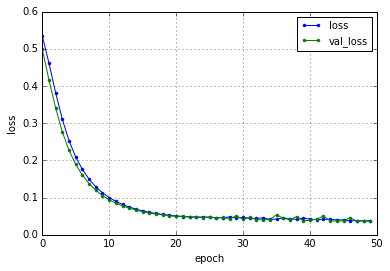

hiden node = 12
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.5491 - val_loss: 0.4904
Epoch 2/50
0s - loss: 0.4368 - val_loss: 0.3729
Epoch 3/50
0s - loss: 0.3265 - val_loss: 0.2765
Epoch 4/50
0s - loss: 0.2437 - val_loss: 0.2091
Epoch 5/50
0s - loss: 0.1869 - val_loss: 0.1635
Epoch 6/50
0s - loss: 0.1484 - val_loss: 0.1324
Epoch 7/50
0s - loss: 0.1217 - val_loss: 0.1102
Epoch 8/50
0s - loss: 0.1025 - val_loss: 0.0942
Epoch 9/50
0s - loss: 0.0886 - val_loss: 0.0824
Epoch 10/50
0s - loss: 0.0781 - val_loss: 0.0735
Epoch 11/50
0s - loss: 0.0702 - val_loss: 0.0666
Epoch 12/50
0s - loss: 0.0641 - val_loss: 0.0618
Epoch 13/50
0s - loss: 0.0594 - val_loss: 0.0573
Epoch 14/50
0s - loss: 0.0557 - val_loss: 0.0538
Epoch 15/50
0s - loss: 0.0527 - val_loss: 0.0511
Epoch 16/50
0s - loss: 0.0503 - val_loss: 0.0492
Epoch 17/50
0s - loss: 0.0490 - val_loss: 0.0472
Epoch 18/50
0s - loss: 0.0469 - val_loss: 0.0470
Epoch 19/50
0s - loss: 0.0458 - val_loss: 0.0447
Epoch 20/50
0s

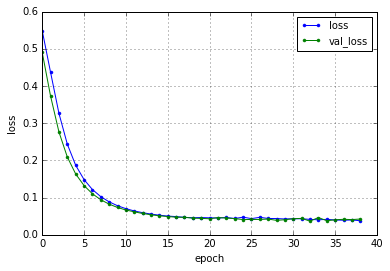

hiden node = 16
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.4988 - val_loss: 0.4272
Epoch 2/50
0s - loss: 0.3636 - val_loss: 0.2937
Epoch 3/50
0s - loss: 0.2488 - val_loss: 0.2030
Epoch 4/50
0s - loss: 0.1758 - val_loss: 0.1483
Epoch 5/50
0s - loss: 0.1319 - val_loss: 0.1150
Epoch 6/50
0s - loss: 0.1045 - val_loss: 0.0937
Epoch 7/50
0s - loss: 0.0868 - val_loss: 0.0794
Epoch 8/50
0s - loss: 0.0747 - val_loss: 0.0696
Epoch 9/50
0s - loss: 0.0662 - val_loss: 0.0626
Epoch 10/50
0s - loss: 0.0602 - val_loss: 0.0574
Epoch 11/50
0s - loss: 0.0556 - val_loss: 0.0538
Epoch 12/50
0s - loss: 0.0521 - val_loss: 0.0504
Epoch 13/50
0s - loss: 0.0496 - val_loss: 0.0483
Epoch 14/50
0s - loss: 0.0472 - val_loss: 0.0462
Epoch 15/50
0s - loss: 0.0462 - val_loss: 0.0471
Epoch 16/50
0s - loss: 0.0454 - val_loss: 0.0435
Epoch 17/50
0s - loss: 0.0441 - val_loss: 0.0423
Epoch 18/50
0s - loss: 0.0433 - val_loss: 0.0450
Epoch 19/50
0s - loss: 0.0431 - val_loss: 0.0432
Epoch 20/50
0s

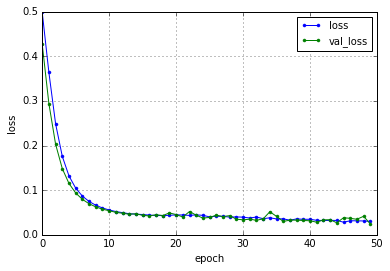

hiden node = 32
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.4819 - val_loss: 0.3579
Epoch 2/50
0s - loss: 0.2702 - val_loss: 0.1864
Epoch 3/50
0s - loss: 0.1456 - val_loss: 0.1093
Epoch 4/50
0s - loss: 0.0930 - val_loss: 0.0781
Epoch 5/50
0s - loss: 0.0706 - val_loss: 0.0633
Epoch 6/50
0s - loss: 0.0592 - val_loss: 0.0551
Epoch 7/50
0s - loss: 0.0526 - val_loss: 0.0500
Epoch 8/50
0s - loss: 0.0483 - val_loss: 0.0465
Epoch 9/50
0s - loss: 0.0453 - val_loss: 0.0438
Epoch 10/50
0s - loss: 0.0429 - val_loss: 0.0418
Epoch 11/50
0s - loss: 0.0410 - val_loss: 0.0399
Epoch 12/50
0s - loss: 0.0394 - val_loss: 0.0389
Epoch 13/50
0s - loss: 0.0395 - val_loss: 0.0397
Epoch 14/50
0s - loss: 0.0390 - val_loss: 0.0360
Epoch 15/50
0s - loss: 0.0386 - val_loss: 0.0372
Epoch 16/50
0s - loss: 0.0391 - val_loss: 0.0360
Epoch 17/50
0s - loss: 0.0369 - val_loss: 0.0370
Epoch 18/50
0s - loss: 0.0376 - val_loss: 0.0340
Epoch 19/50
0s - loss: 0.0362 - val_loss: 0.0331
Epoch 20/50
0s

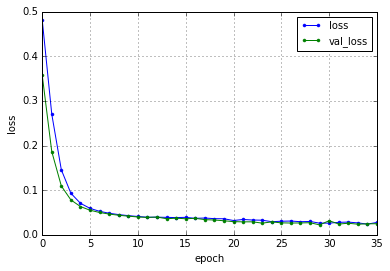

hiden node = 64
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.4327 - val_loss: 0.2476
Epoch 2/50
0s - loss: 0.1624 - val_loss: 0.0972
Epoch 3/50
0s - loss: 0.0770 - val_loss: 0.0617
Epoch 4/50
0s - loss: 0.0560 - val_loss: 0.0509
Epoch 5/50
0s - loss: 0.0483 - val_loss: 0.0455
Epoch 6/50
0s - loss: 0.0438 - val_loss: 0.0418
Epoch 7/50
0s - loss: 0.0405 - val_loss: 0.0389
Epoch 8/50
0s - loss: 0.0378 - val_loss: 0.0365
Epoch 9/50
0s - loss: 0.0356 - val_loss: 0.0345
Epoch 10/50
0s - loss: 0.0333 - val_loss: 0.0327
Epoch 11/50
0s - loss: 0.0323 - val_loss: 0.0303
Epoch 12/50
0s - loss: 0.0308 - val_loss: 0.0298
Epoch 13/50
0s - loss: 0.0304 - val_loss: 0.0280
Epoch 14/50
0s - loss: 0.0314 - val_loss: 0.0306
Epoch 15/50
0s - loss: 0.0294 - val_loss: 0.0262
Epoch 16/50
0s - loss: 0.0273 - val_loss: 0.0254
Epoch 17/50
0s - loss: 0.0256 - val_loss: 0.0245
Epoch 18/50
0s - loss: 0.0273 - val_loss: 0.0232
Epoch 19/50
0s - loss: 0.0252 - val_loss: 0.0256
Epoch 20/50
0s

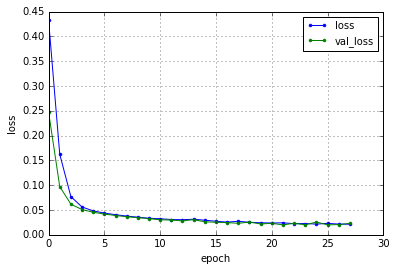

AccX is registed now
Build Complete
(254742,)
windowData's num =992
SourceData's aborting data = 22
window shape is (992, 1024, 1)
hiden node = 4
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.5548 - val_loss: 0.5501
Epoch 2/50
0s - loss: 0.5478 - val_loss: 0.5432
Epoch 3/50
0s - loss: 0.5400 - val_loss: 0.5336
Epoch 4/50
0s - loss: 0.5294 - val_loss: 0.5215
Epoch 5/50
0s - loss: 0.5168 - val_loss: 0.5084
Epoch 6/50
0s - loss: 0.5037 - val_loss: 0.4953
Epoch 7/50
0s - loss: 0.4906 - val_loss: 0.4823
Epoch 8/50
0s - loss: 0.4777 - val_loss: 0.4697
Epoch 9/50
0s - loss: 0.4652 - val_loss: 0.4574
Epoch 10/50
0s - loss: 0.4530 - val_loss: 0.4453
Epoch 11/50
0s - loss: 0.4411 - val_loss: 0.4337
Epoch 12/50
0s - loss: 0.4296 - val_loss: 0.4224
Epoch 13/50
0s - loss: 0.4183 - val_loss: 0.4114
Epoch 14/50
0s - loss: 0.4075 - val_loss: 0.4007
Epoch 15/50
0s - loss: 0.3969 - val_loss: 0.3904
Epoch 16/50
0s - loss: 0.3867 - val_loss: 0.3804
Epoch 17/50
0s - loss: 0.3769 - v

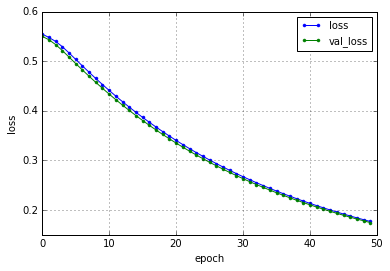

hiden node = 8
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.5597 - val_loss: 0.5504
Epoch 2/50
0s - loss: 0.5459 - val_loss: 0.5365
Epoch 3/50
0s - loss: 0.5295 - val_loss: 0.5164
Epoch 4/50
0s - loss: 0.5083 - val_loss: 0.4936
Epoch 5/50
0s - loss: 0.4853 - val_loss: 0.4707
Epoch 6/50
0s - loss: 0.4625 - val_loss: 0.4484
Epoch 7/50
0s - loss: 0.4406 - val_loss: 0.4272
Epoch 8/50
0s - loss: 0.4198 - val_loss: 0.4070
Epoch 9/50
0s - loss: 0.4000 - val_loss: 0.3880
Epoch 10/50
0s - loss: 0.3813 - val_loss: 0.3699
Epoch 11/50
0s - loss: 0.3637 - val_loss: 0.3529
Epoch 12/50
0s - loss: 0.3471 - val_loss: 0.3369
Epoch 13/50
0s - loss: 0.3314 - val_loss: 0.3219
Epoch 14/50
0s - loss: 0.3167 - val_loss: 0.3077
Epoch 15/50
0s - loss: 0.3028 - val_loss: 0.2944
Epoch 16/50
0s - loss: 0.2898 - val_loss: 0.2819
Epoch 17/50
0s - loss: 0.2776 - val_loss: 0.2701
Epoch 18/50
0s - loss: 0.2660 - val_loss: 0.2590
Epoch 19/50
0s - loss: 0.2552 - val_loss: 0.2485
Epoch 20/50
0s - 

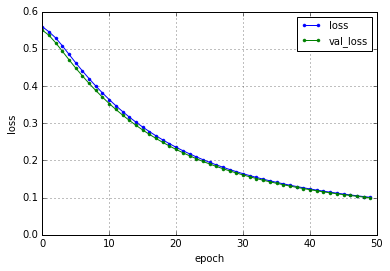

hiden node = 12
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.5571 - val_loss: 0.5438
Epoch 2/50
0s - loss: 0.5377 - val_loss: 0.5262
Epoch 3/50
0s - loss: 0.5187 - val_loss: 0.5050
Epoch 4/50
0s - loss: 0.4966 - val_loss: 0.4816
Epoch 5/50
0s - loss: 0.4727 - val_loss: 0.4570
Epoch 6/50
0s - loss: 0.4479 - val_loss: 0.4318
Epoch 7/50
0s - loss: 0.4227 - val_loss: 0.4068
Epoch 8/50
0s - loss: 0.3978 - val_loss: 0.3824
Epoch 9/50
0s - loss: 0.3740 - val_loss: 0.3596
Epoch 10/50
0s - loss: 0.3518 - val_loss: 0.3384
Epoch 11/50
0s - loss: 0.3311 - val_loss: 0.3187
Epoch 12/50
0s - loss: 0.3119 - val_loss: 0.3004
Epoch 13/50
0s - loss: 0.2942 - val_loss: 0.2837
Epoch 14/50
0s - loss: 0.2779 - val_loss: 0.2681
Epoch 15/50
0s - loss: 0.2629 - val_loss: 0.2538
Epoch 16/50
0s - loss: 0.2490 - val_loss: 0.2406
Epoch 17/50
0s - loss: 0.2361 - val_loss: 0.2284
Epoch 18/50
0s - loss: 0.2243 - val_loss: 0.2171
Epoch 19/50
0s - loss: 0.2133 - val_loss: 0.2067
Epoch 20/50
0s -

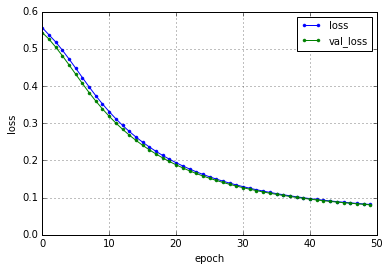

hiden node = 16
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.5544 - val_loss: 0.5400
Epoch 2/50
0s - loss: 0.5320 - val_loss: 0.5159
Epoch 3/50
0s - loss: 0.5047 - val_loss: 0.4833
Epoch 4/50
0s - loss: 0.4700 - val_loss: 0.4465
Epoch 5/50
0s - loss: 0.4331 - val_loss: 0.4099
Epoch 6/50
0s - loss: 0.3972 - val_loss: 0.3755
Epoch 7/50
0s - loss: 0.3639 - val_loss: 0.3441
Epoch 8/50
0s - loss: 0.3336 - val_loss: 0.3159
Epoch 9/50
0s - loss: 0.3065 - val_loss: 0.2907
Epoch 10/50
0s - loss: 0.2823 - val_loss: 0.2682
Epoch 11/50
0s - loss: 0.2607 - val_loss: 0.2482
Epoch 12/50
0s - loss: 0.2416 - val_loss: 0.2304
Epoch 13/50
0s - loss: 0.2245 - val_loss: 0.2145
Epoch 14/50
0s - loss: 0.2092 - val_loss: 0.2003
Epoch 15/50
0s - loss: 0.1956 - val_loss: 0.1877
Epoch 16/50
0s - loss: 0.1835 - val_loss: 0.1763
Epoch 17/50
0s - loss: 0.1726 - val_loss: 0.1662
Epoch 18/50
0s - loss: 0.1628 - val_loss: 0.1570
Epoch 19/50
0s - loss: 0.1539 - val_loss: 0.1487
Epoch 20/50
0s -

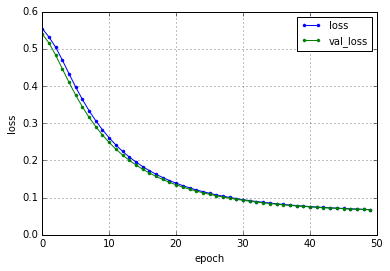

hiden node = 32
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.5544 - val_loss: 0.5238
Epoch 2/50
0s - loss: 0.5081 - val_loss: 0.4777
Epoch 3/50
0s - loss: 0.4582 - val_loss: 0.4224
Epoch 4/50
0s - loss: 0.4017 - val_loss: 0.3658
Epoch 5/50
0s - loss: 0.3466 - val_loss: 0.3142
Epoch 6/50
0s - loss: 0.2974 - val_loss: 0.2696
Epoch 7/50
0s - loss: 0.2556 - val_loss: 0.2327
Epoch 8/50
0s - loss: 0.2214 - val_loss: 0.2028
Epoch 9/50
0s - loss: 0.1937 - val_loss: 0.1788
Epoch 10/50
0s - loss: 0.1715 - val_loss: 0.1595
Epoch 11/50
0s - loss: 0.1536 - val_loss: 0.1440
Epoch 12/50
0s - loss: 0.1392 - val_loss: 0.1313
Epoch 13/50
0s - loss: 0.1274 - val_loss: 0.1210
Epoch 14/50
0s - loss: 0.1178 - val_loss: 0.1125
Epoch 15/50
0s - loss: 0.1098 - val_loss: 0.1053
Epoch 16/50
0s - loss: 0.1031 - val_loss: 0.0993
Epoch 17/50
0s - loss: 0.0974 - val_loss: 0.0942
Epoch 18/50
0s - loss: 0.0926 - val_loss: 0.0899
Epoch 19/50
0s - loss: 0.0886 - val_loss: 0.0862
Epoch 20/50
0s -

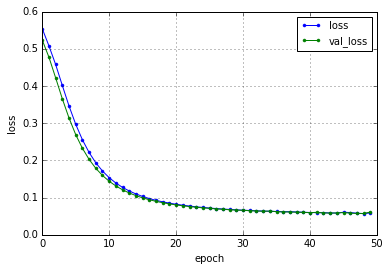

hiden node = 64
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.5532 - val_loss: 0.4944
Epoch 2/50
0s - loss: 0.4629 - val_loss: 0.4047
Epoch 3/50
0s - loss: 0.3709 - val_loss: 0.3139
Epoch 4/50
0s - loss: 0.2856 - val_loss: 0.2401
Epoch 5/50
0s - loss: 0.2192 - val_loss: 0.1867
Epoch 6/50
0s - loss: 0.1723 - val_loss: 0.1500
Epoch 7/50
0s - loss: 0.1404 - val_loss: 0.1254
Epoch 8/50
0s - loss: 0.1189 - val_loss: 0.1087
Epoch 9/50
0s - loss: 0.1042 - val_loss: 0.0972
Epoch 10/50
0s - loss: 0.0940 - val_loss: 0.0889
Epoch 11/50
0s - loss: 0.0866 - val_loss: 0.0828
Epoch 12/50
0s - loss: 0.0810 - val_loss: 0.0781
Epoch 13/50
0s - loss: 0.0768 - val_loss: 0.0745
Epoch 14/50
0s - loss: 0.0735 - val_loss: 0.0717
Epoch 15/50
0s - loss: 0.0708 - val_loss: 0.0694
Epoch 16/50
0s - loss: 0.0687 - val_loss: 0.0675
Epoch 17/50
0s - loss: 0.0669 - val_loss: 0.0658
Epoch 18/50
0s - loss: 0.0654 - val_loss: 0.0644
Epoch 19/50
0s - loss: 0.0640 - val_loss: 0.0632
Epoch 20/50
0s -

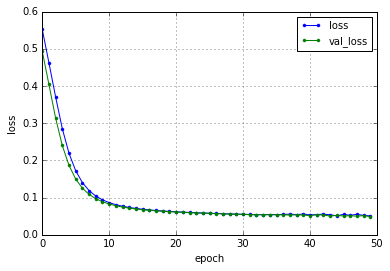

In [8]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    w=window.Window()
    w.SetData(Axis,dic[Axis])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
    # define SaveFileName
    for encoding_dim in EncodingDim:
        print "hiden node = "+str(encoding_dim)
        SaveFileNameEncord=DataName+'_encoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameDecord=DataName+'_decoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameNet=DataName+'_net'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameTrain=DataName+'_train'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameTest=DataName+'_test'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameGlaph=GlaphDataPath+DataName+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer='adadelta', loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2,
                        batch_size=shapeNum/4,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])

        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()